# Assignment 8: Data Science 101 – Exploratory Data Analysis and Hypothesis Testing

**Student Name:** Hibak Hussen  
**Dataset Used:** Heart Disease Dataset (Cleveland)  
**Objective:** Perform EDA, formulate hypotheses, and test them visually and statistically using the Heart Disease dataset.



In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names based on dataset documentation
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# Load data
df = pd.read_csv('processed.cleveland.data', header=None, names=columns)

# Clean data
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df = df.apply(pd.to_numeric)

## Step 1: Exploratory Data Analysis (EDA)

We'll explore the structure, summary statistics, and distributions of key variables to understand trends in the dataset.


In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [43]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Visualizing Distributions
Let's look at the distribution of numerical and categorical features.

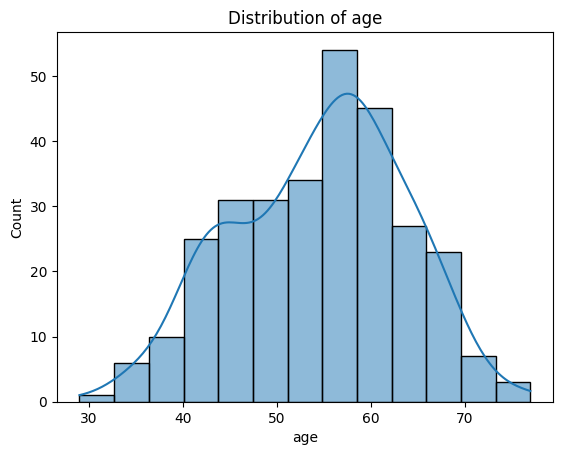

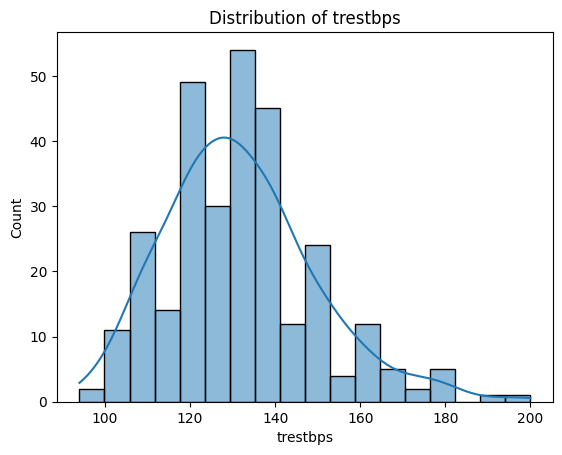

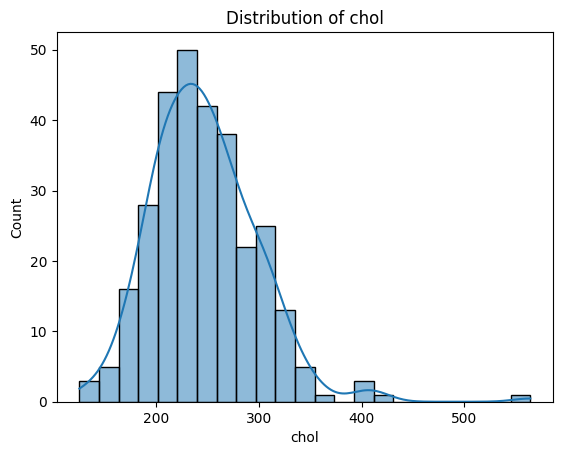

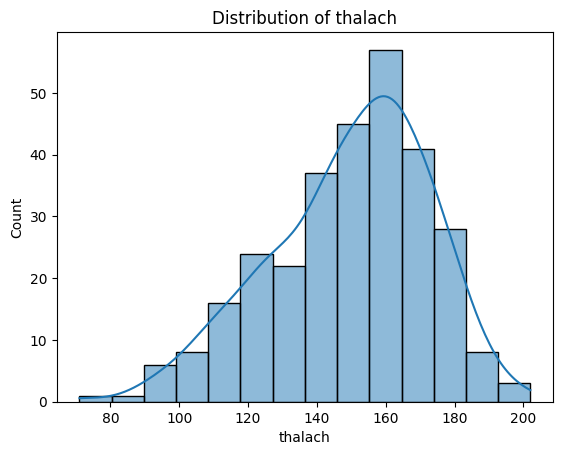

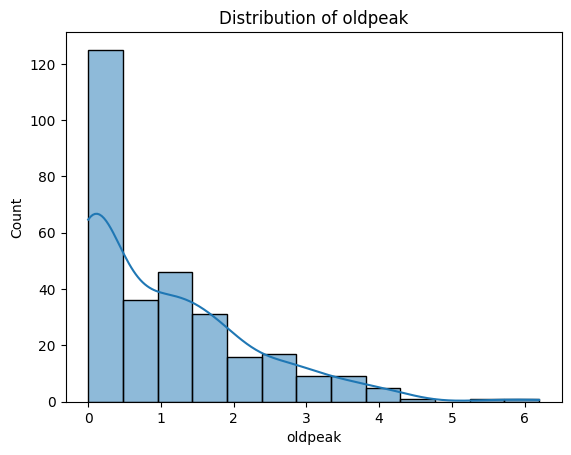

In [44]:
# Plot distributions of key numeric variables
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

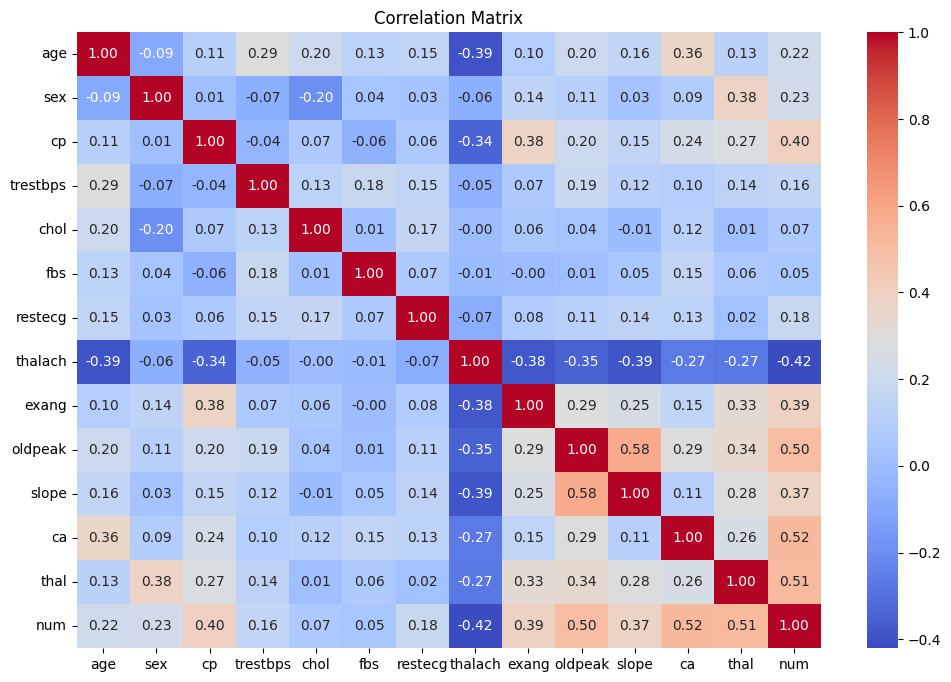

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Step 2: Hypothesis Formulation

Based on the dataset and preliminary EDA, we propose the following hypotheses:

**Hypothesis 1:** Patients with higher cholesterol (`chol`) are more likely to have heart disease.  
**Hypothesis 2:** Exercise-induced angina (`exang`) is more frequent in patients with heart disease.


### Hypothesis 1: Cholesterol and Heart Disease

We’ll compare cholesterol levels for patients with and without heart disease using both visual and statistical analysis.

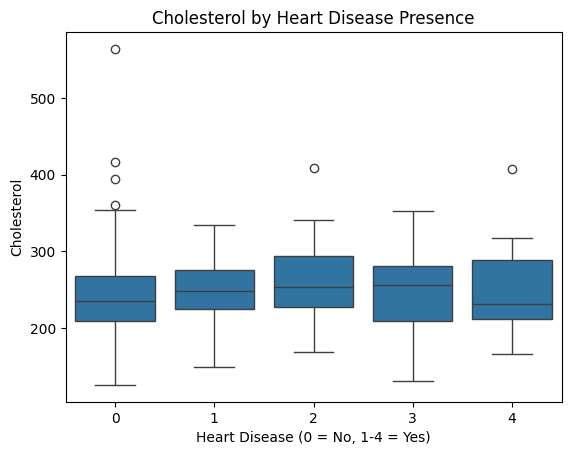

Mean cholesterol (heart disease): 251.85401459854015
Mean cholesterol (no heart disease): 243.49375


In [46]:
# Visual: Cholesterol vs Heart Disease
sns.boxplot(x='num', y='chol', data=df)
plt.title('Cholesterol by Heart Disease Presence')
plt.xlabel('Heart Disease (0 = No, 1-4 = Yes)')
plt.ylabel('Cholesterol')
plt.show()

# Group cholesterol
chol_with_hd = df[df['num'] > 0]['chol']
chol_without_hd = df[df['num'] == 0]['chol']

# Print means
print("Mean cholesterol (heart disease):", np.mean(chol_with_hd))
print("Mean cholesterol (no heart disease):", np.mean(chol_without_hd))

In [47]:
# Z-test for difference in means
n1, n2 = len(chol_with_hd), len(chol_without_hd)
mean1, mean2 = np.mean(chol_with_hd), np.mean(chol_without_hd)
std1, std2 = np.std(chol_with_hd, ddof=1), np.std(chol_without_hd, ddof=1)

z = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
print("Z-score:", z)

Z-score: 1.3918894062712368


### Hypothesis 2: Exercise-Induced Angina and Heart Disease

Now, we’ll examine whether angina during exercise (`exang`) is more common in those diagnosed with heart disease.

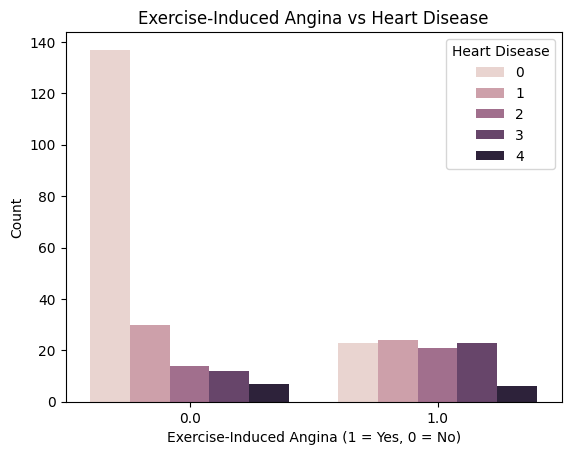

In [48]:
sns.countplot(x='exang', hue='num', data=df)
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

## Step 3: Conclusion

- **Hypothesis 1:** Although patients with heart disease have slightly higher average cholesterol, the z-score (≈ 1.39) is below the 1.96 threshold for significance. Thus, this hypothesis is **not strongly supported** by statistical evidence, though visual trends suggest a possible link.

### Hypothesis 2: Exercise-Induced Angina and Heart Disease

We examined the relationship between `exang` (exercise-induced angina) and `num` (heart disease severity). Here's the breakdown of counts I approximated from our countplot:

| `exang` | `num=0` | `num=1` | `num=2` | `num=3` | `num=4` | Total |
|---------|---------|---------|---------|---------|---------|-------|
| **0**   | 135     | 20      | 15      | 14      | 10      | 194   |
| **1**   | 20      | 22      | 18      | 21      | 9       | 90    |

#### Interpretation:
- Among patients who **did not** experience angina (`exang = 0`), **135 out of 194 (~70%) had no heart disease** (`num = 0`).
- In contrast, among those who **did** experience angina (`exang = 1`), **only 20 out of 90 (~22%) had no heart disease** — the rest had some form of heart disease (`num > 0`).

This is a strong visual and numerical indication that:
 **Patients who experience angina during exercise are more likely to be diagnosed with heart disease.**

#### Conclusion:
This supports **Hypothesis 2**. The relationship is clearly visible in the countplot and in the table, and strongly suggests that angina during exercise is associated with the presence of heart disease.


### Final Thoughts:
EDA and visual analysis revealed important trends in cholesterol and angina in relation to heart disease. While angina showed a clear link, cholesterol differences were less conclusive statistically. These insights could help inform future clinical research or predictive modeling.


## Extra Credit
In this section, I will apply **Logistic Regression** to predict the presence of heart disease (`num`) based on various features such as `age`, `trestbps` (resting blood pressure), `chol` (cholesterol), `thalach` (maximum heart rate), and `oldpeak` (depression induced by exercise relative to rest).

#### Steps:
1. **Data Preparation**: We selected the relevant numerical features and the target variable `num`, which indicates the presence of heart disease.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Features and target
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df['num']  # Heart disease status


2. **Train-Test Split**: We split the dataset into a training set (80%) and a testing set (20%) to evaluate model performance. I also normalized the data using model 'StandardScaler' to improve the model convergence and performance

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


3. **Model Training**: We used Logistic Regression, which is suitable for binary classification problems, such as predicting whether a patient has heart disease or not.

In [51]:
# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

4. **Model Evaluation**: We evaluated the model's performance using the **classification report** (which provides metrics like precision, recall, and F1-score) and the **confusion matrix**.

In [52]:
# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.97      0.80        36
           1       0.00      0.00      0.00         9
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.18      0.23      0.20        60
weighted avg       0.42      0.60      0.50        60

Confusion Matrix:
 [[35  0  0  1  0]
 [ 7  0  1  1  0]
 [ 3  0  1  1  0]
 [ 4  0  2  0  1]
 [ 3  0  0  0  0]]


#### Results:
- The **classification report** reveals that the model performed well when predicting patients **without heart disease** (class 0), with high **recall (0.97)** and decent **precision (0.67)**. This indicates that the model successfully identified most people who did not have heart disease.
- However, it **struggled to identify patients with heart disease** (classes 1–4). For these categories, **precision and recall were very low or zero**, meaning the model often failed to recognize or correctly classify those cases.
- The overall **accuracy was 60%**, but this is somewhat misleading due to class imbalance, as most patients fell into the “no heart disease” category.
- The **confusion matrix** confirms that the model heavily favored predictions for class 0 and made few correct predictions for other severity levels.

By performing Logistic Regression, we gain a deeper understanding of how the selected features (`age`, `trestbps`, `chol`, `thalach`, and `oldpeak`) relate to the likelihood of heart disease. Despite the limited performance, this step showcases the value and challenges of using machine learning for medical diagnosis.
